In [1]:
import pandas as pd

df = pd.read_excel('~/Downloads/АДвБ/Project/data.xlsx')
df['created_at'] = df['created_at'].dt.date
target = pd.read_excel('~/Downloads/АДвБ/Project/data.xlsx', 'убытки(целевая переменная)')
target['дата убытка'] = target['дата убытка'].dt.date
df.head()

/tmp/ipykernel_35380/978669406.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df = pd.read_excel('~/Downloads/АДвБ/Project/data.xlsx')


,created_at,status,guarant_letter_uuid,comment_len,is_paid_by_patient,patient_id,has_doctor,doctor_len,diagnosis_len,diagnosis_clarification_len,...,service_status,service_quantity,service_code,folk_1_code,folk_2_code,folk_3_code,folk_4_code,service_level_3_category_hash,service_level_2_category_hash,service_level
0,2022-02-28,delivered,7f2a9c90-1599-42a4-871d-b6cfc5349f24,49,False,176587,True,0,0,0,...,0,1,0fc1c709c57b84c756e2347fc5dda380,a3dd97667c8f2bb47a7391c769e2e868,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,a3dd97667c8f2bb47a7391c769e2e868,3
1,2022-02-28,delivered,796f3150-a8a7-40e8-b906-13b531de7bcf,44,False,177711,True,0,0,0,...,0,1,b602362c2a586c560131d97cf5b14075,195dc214249dab3c31906b4b9f83d503,b718adec73e04ce3ec720dd11a06a308,63a9f0ea7bb98050796b649e85481845,NaN,195dc214249dab3c31906b4b9f83d503,b602362c2a586c560131d97cf5b14075,3
2,2022-02-28,delivered,a48c27f7-d645-4b49-bc49-37302b406e1c,107,False,76776,True,0,0,23,...,0,1,44d7c109bf5552287fd73a30ded5d6d6,883df3cf6bc90d69afb61c2fe31be838,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,883df3cf6bc90d69afb61c2fe31be838,3
3,2022-02-28,delivered,a48c27f7-d645-4b49-bc49-37302b406e1c,107,False,76776,True,0,0,23,...,0,1,746da6d65d78980c617eb8ead13a74a4,bb04f5f7eeb7aa2ca785b724a1c16752,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,bb04f5f7eeb7aa2ca785b724a1c16752,3
4,2022-02-28,not_delivered,482b781f-a376-4978-a712-bf0ad5fd1d30,94,False,105692,True,27,0,0,...,0,1,867de31618ddaf86ccdc872f60203135,6b4bc42634c38300eb38251b1356f64e,5d7247c6609e95d4180a71551b9d8d59,92a54b358b4cf53cca4095e4697e1004,63a9f0ea7bb98050796b649e85481845,92a54b358b4cf53cca4095e4697e1004,5d7247c6609e95d4180a71551b9d8d59,4


In [2]:
new_data = df.groupby(['created_at', 'patient_id'])['folk_1_code'].agg('nunique').reset_index()

In [3]:
new_data['folk_2_code'] = df.groupby(['created_at', 'patient_id'])['folk_2_code'].agg('nunique').reset_index()['folk_2_code']
new_data['folk_3_code'] = df.groupby(['created_at', 'patient_id'])['folk_3_code'].agg('nunique').reset_index()['folk_3_code']
new_data['folk_4_code'] = df.groupby(['created_at', 'patient_id'])['folk_4_code'].agg('nunique').reset_index()['folk_4_code']
new_data['folk_2_code'] = df.groupby(['created_at', 'patient_id'])['folk_2_code'].agg('nunique').reset_index()['folk_2_code']
new_data['comment_len'] = df.groupby(['created_at', 'patient_id'])['comment_len'].agg('mean').reset_index()['comment_len']
new_data['service_code'] = df.groupby(['created_at', 'patient_id'])['service_code'].agg('nunique').reset_index()['service_code']
new_data['service_level_3_category_hash'] = df.groupby(['created_at', 'patient_id'])['service_level_3_category_hash'].agg('nunique').reset_index()['service_level_3_category_hash']
new_data['service_level_2_category_hash'] = df.groupby(['created_at', 'patient_id'])['service_level_2_category_hash'].agg('nunique').reset_index()['service_level_2_category_hash']
new_data['service_level'] = df.groupby(['created_at', 'patient_id'])['service_level'].agg('mean').reset_index()['service_level']
new_data['status'] = df.groupby(['created_at', 'patient_id'])['status'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['status']
new_data['is_paid_by_patient'] = df.groupby(['created_at', 'patient_id'])['is_paid_by_patient'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['is_paid_by_patient']
new_data['has_doctor'] = df.groupby(['created_at', 'patient_id'])['has_doctor'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['has_doctor']
new_data['doctor_len'] = df.groupby(['created_at', 'patient_id'])['doctor_len'].agg('sum').reset_index()['doctor_len']
new_data['diagnosis_len'] = df.groupby(['created_at', 'patient_id'])['diagnosis_len'].agg('sum').reset_index()['diagnosis_len']
new_data['diagnosis_clarification_len'] = df.groupby(['created_at', 'patient_id'])['diagnosis_clarification_len'].agg('sum').reset_index()['diagnosis_clarification_len']
new_data['standartized_diagnosis_len'] = df.groupby(['created_at', 'patient_id'])['standartized_diagnosis_len'].agg('sum').reset_index()['standartized_diagnosis_len']
new_data['diagnosis_uuid'] = df.groupby(['created_at', 'patient_id'])['diagnosis_uuid'].agg('nunique').reset_index()['diagnosis_uuid']
new_data['diagnosis_category_level_3_hash'] = df.groupby(['created_at', 'patient_id'])['diagnosis_category_level_3_hash'].agg('nunique').reset_index()['diagnosis_category_level_3_hash']
new_data['service_status'] = df.groupby(['created_at', 'patient_id'])['service_status'].agg('mean').reset_index()['service_status']
new_data['diagnosis_category_level_1_hash'] = df.groupby(['created_at', 'patient_id'])['diagnosis_category_level_1_hash'].agg('nunique').reset_index()['diagnosis_category_level_1_hash']
new_data['service_quantity'] = df.groupby(['created_at', 'patient_id'])['service_quantity'].agg('mean').reset_index()['service_quantity']
new_data

,created_at,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,has_doctor,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity
0,2020-07-01,1409,7,3,2,1,334.00,10,3,7,...,True,0,1120,0,0.0,0,0,0.200000,0,1.000000
1,2020-07-01,3084,6,2,1,1,180.00,9,1,2,...,True,0,990,0,0.0,0,0,0.444444,0,1.000000
2,2020-07-01,3824,5,1,1,0,320.00,5,1,5,...,True,0,240,0,0.0,0,0,0.000000,0,1.000000
3,2020-07-01,7792,1,1,1,0,32.00,1,1,1,...,True,0,64,0,0.0,0,0,0.000000,0,2.000000
4,2020-07-01,10343,1,1,1,0,61.00,2,1,2,...,True,0,74,0,0.0,0,0,0.000000,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153944,2022-02-28,202604,1,1,1,0,58.00,1,1,1,...,True,0,0,0,14.0,1,1,0.000000,1,1.000000
153945,2022-02-28,203270,0,1,1,0,127.50,0,0,0,...,True,0,124,0,0.0,0,0,0.000000,0,1.000000
153946,2022-02-28,203918,3,2,1,0,223.75,7,2,3,...,True,0,0,0,334.0,2,2,0.000000,2,1.000000
153947,2022-02-28,204301,2,2,2,1,87.00,2,2,2,...,True,0,0,0,81.0,1,1,0.333333,1,4.333333


In [4]:
new_data.isna().any()

created_at                         False
patient_id                         False
folk_1_code                        False
folk_2_code                        False
folk_3_code                        False
folk_4_code                        False
comment_len                        False
service_code                       False
service_level_3_category_hash      False
service_level_2_category_hash      False
service_level                      False
status                             False
is_paid_by_patient                 False
has_doctor                         False
doctor_len                         False
diagnosis_len                      False
diagnosis_clarification_len        False
standartized_diagnosis_len         False
diagnosis_uuid                     False
diagnosis_category_level_3_hash    False
service_status                     False
diagnosis_category_level_1_hash    False
service_quantity                   False
dtype: bool

In [5]:
target['month'] = pd.DatetimeIndex(target['дата убытка']).to_period('M')
new_data['created_at_month'] = pd.DatetimeIndex(new_data['created_at']).to_period('M')

In [6]:
target

,patient_id,дата убытка,loss,month
0,70772,2021-12-14,4.743,2021-12
1,48418,2021-11-22,3.200,2021-11
2,147869,2021-09-11,1.350,2021-09
3,109626,2021-04-29,6.520,2021-04
4,47870,2021-10-04,1.322,2021-10
...,...,...,...,...
464176,85154,2021-06-21,2.200,2021-06
464177,74712,2021-07-22,1.200,2021-07
464178,86376,2021-02-17,2.600,2021-02
464179,85204,2021-08-17,3.200,2021-08


In [7]:
new_target = target.groupby(['month', 'patient_id'])['loss'].agg('sum').reset_index()
new_target

,month,patient_id,loss
0,2020-07,1572,0.8000
1,2020-07,2946,50.3430
2,2020-07,3186,2.6000
3,2020-07,3277,8.1696
4,2020-07,3383,6.8400
...,...,...,...
171519,2022-02,204487,2.1780
171520,2022-02,204506,3.5280
171521,2022-02,204806,10.7360
171522,2022-02,204818,1.2160


In [8]:
new_data

,created_at,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,created_at_month
0,2020-07-01,1409,7,3,2,1,334.00,10,3,7,...,0,1120,0,0.0,0,0,0.200000,0,1.000000,2020-07
1,2020-07-01,3084,6,2,1,1,180.00,9,1,2,...,0,990,0,0.0,0,0,0.444444,0,1.000000,2020-07
2,2020-07-01,3824,5,1,1,0,320.00,5,1,5,...,0,240,0,0.0,0,0,0.000000,0,1.000000,2020-07
3,2020-07-01,7792,1,1,1,0,32.00,1,1,1,...,0,64,0,0.0,0,0,0.000000,0,2.000000,2020-07
4,2020-07-01,10343,1,1,1,0,61.00,2,1,2,...,0,74,0,0.0,0,0,0.000000,0,1.000000,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153944,2022-02-28,202604,1,1,1,0,58.00,1,1,1,...,0,0,0,14.0,1,1,0.000000,1,1.000000,2022-02
153945,2022-02-28,203270,0,1,1,0,127.50,0,0,0,...,0,124,0,0.0,0,0,0.000000,0,1.000000,2022-02
153946,2022-02-28,203918,3,2,1,0,223.75,7,2,3,...,0,0,0,334.0,2,2,0.000000,2,1.000000,2022-02
153947,2022-02-28,204301,2,2,2,1,87.00,2,2,2,...,0,0,0,81.0,1,1,0.333333,1,4.333333,2022-02


создать количество обращений за месяц agg(size), смержить по newest_data['created_at_month'] = target['month']

In [9]:
newest_data = new_data.groupby(['created_at_month', 'patient_id'])['folk_1_code'].agg('nunique').reset_index()

newest_data['folk_2_code'] = new_data.groupby(['created_at_month', 'patient_id'])['folk_2_code'].agg('nunique').reset_index()['folk_2_code']
newest_data['folk_3_code'] = new_data.groupby(['created_at_month', 'patient_id'])['folk_3_code'].agg('nunique').reset_index()['folk_3_code']
newest_data['folk_4_code'] = new_data.groupby(['created_at_month', 'patient_id'])['folk_4_code'].agg('nunique').reset_index()['folk_4_code']
newest_data['folk_2_code'] = new_data.groupby(['created_at_month', 'patient_id'])['folk_2_code'].agg('nunique').reset_index()['folk_2_code']
newest_data['comment_len'] = new_data.groupby(['created_at_month', 'patient_id'])['comment_len'].agg('mean').reset_index()['comment_len']
newest_data['service_code'] = new_data.groupby(['created_at_month', 'patient_id'])['service_code'].agg('nunique').reset_index()['service_code']
newest_data['service_level_3_category_hash'] = new_data.groupby(['created_at_month', 'patient_id'])['service_level_3_category_hash'].agg('nunique').reset_index()['service_level_3_category_hash']
newest_data['service_level_2_category_hash'] = new_data.groupby(['created_at_month', 'patient_id'])['service_level_2_category_hash'].agg('nunique').reset_index()['service_level_2_category_hash']
newest_data['service_level'] = new_data.groupby(['created_at_month', 'patient_id'])['service_level'].agg('mean').reset_index()['service_level']
newest_data['status'] = new_data.groupby(['created_at_month', 'patient_id'])['status'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['status']
newest_data['is_paid_by_patient'] = new_data.groupby(['created_at_month', 'patient_id'])['is_paid_by_patient'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['is_paid_by_patient']
newest_data['has_doctor'] = new_data.groupby(['created_at_month', 'patient_id'])['has_doctor'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()['has_doctor']
newest_data['doctor_len'] = new_data.groupby(['created_at_month', 'patient_id'])['doctor_len'].agg('sum').reset_index()['doctor_len']
newest_data['diagnosis_len'] = new_data.groupby(['created_at_month', 'patient_id'])['diagnosis_len'].agg('sum').reset_index()['diagnosis_len']
newest_data['diagnosis_clarification_len'] = new_data.groupby(['created_at_month', 'patient_id'])['diagnosis_clarification_len'].agg('sum').reset_index()['diagnosis_clarification_len']
newest_data['standartized_diagnosis_len'] = new_data.groupby(['created_at_month', 'patient_id'])['standartized_diagnosis_len'].agg('sum').reset_index()['standartized_diagnosis_len']
newest_data['diagnosis_uuid'] = new_data.groupby(['created_at_month', 'patient_id'])['diagnosis_uuid'].agg('nunique').reset_index()['diagnosis_uuid']
newest_data['diagnosis_category_level_3_hash'] = new_data.groupby(['created_at_month', 'patient_id'])['diagnosis_category_level_3_hash'].agg('nunique').reset_index()['diagnosis_category_level_3_hash']
newest_data['service_status'] = new_data.groupby(['created_at_month', 'patient_id'])['service_status'].agg('mean').reset_index()['service_status']
newest_data['diagnosis_category_level_1_hash'] = new_data.groupby(['created_at_month', 'patient_id'])['diagnosis_category_level_1_hash'].agg('nunique').reset_index()['diagnosis_category_level_1_hash']
newest_data['service_quantity'] = new_data.groupby(['created_at_month', 'patient_id'])['service_quantity'].agg('mean').reset_index()['service_quantity']
newest_data

,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,has_doctor,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity
0,2020-07,294,1,1,1,1,26.000000,1,1,1,...,True,0,35,0,0.0,1,1,0.00,1,1.000000
1,2020-07,313,3,3,1,2,117.928571,3,2,3,...,True,0,3651,0,0.0,1,1,0.00,1,3.761905
2,2020-07,349,1,1,1,1,209.000000,1,1,1,...,True,0,115,0,0.0,1,1,0.00,1,1.000000
3,2020-07,418,3,3,3,2,55.416667,3,3,3,...,True,0,1023,0,0.0,1,1,0.00,1,4.500000
4,2020-07,509,1,1,1,1,45.000000,2,1,1,...,True,0,124,0,0.0,1,1,0.25,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108240,2022-02,204496,2,2,2,2,89.500000,2,2,2,...,True,0,0,176,270.0,1,1,0.00,1,1.000000
108241,2022-02,204641,1,1,1,1,488.000000,1,1,1,...,True,92,0,0,144.0,1,1,0.00,1,1.000000
108242,2022-02,204750,1,1,1,1,97.000000,1,1,1,...,True,0,0,0,68.0,1,1,0.00,1,1.000000
108243,2022-02,204818,1,1,1,1,167.000000,1,1,1,...,True,0,0,0,129.0,1,1,0.00,1,1.000000


In [10]:
newest_data['cnt_visit'] = new_data.groupby(['created_at_month', 'patient_id'])['created_at'].agg('size').reset_index()['created_at']

In [11]:
newest_data

,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit
0,2020-07,294,1,1,1,1,26.000000,1,1,1,...,0,35,0,0.0,1,1,0.00,1,1.000000,1
1,2020-07,313,3,3,1,2,117.928571,3,2,3,...,0,3651,0,0.0,1,1,0.00,1,3.761905,3
2,2020-07,349,1,1,1,1,209.000000,1,1,1,...,0,115,0,0.0,1,1,0.00,1,1.000000,1
3,2020-07,418,3,3,3,2,55.416667,3,3,3,...,0,1023,0,0.0,1,1,0.00,1,4.500000,3
4,2020-07,509,1,1,1,1,45.000000,2,1,1,...,0,124,0,0.0,1,1,0.25,1,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108240,2022-02,204496,2,2,2,2,89.500000,2,2,2,...,0,0,176,270.0,1,1,0.00,1,1.000000,2
108241,2022-02,204641,1,1,1,1,488.000000,1,1,1,...,92,0,0,144.0,1,1,0.00,1,1.000000,1
108242,2022-02,204750,1,1,1,1,97.000000,1,1,1,...,0,0,0,68.0,1,1,0.00,1,1.000000,1
108243,2022-02,204818,1,1,1,1,167.000000,1,1,1,...,0,0,0,129.0,1,1,0.00,1,1.000000,1


In [12]:
data = newest_data.merge(target, left_on=['created_at_month', 'patient_id'], right_on=['month', 'patient_id'], how='inner')
data

,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,дата убытка,loss,month
0,2020-07,3383,1,1,1,1,211.000000,1,1,1,...,0.0,1,1,0.428571,1,1.000,1,2020-07-19,6.840,2020-07
1,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-31,2.090,2020-07
2,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-19,3.150,2020-07
3,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-17,9.200,2020-07
4,2020-07,3673,1,1,1,1,31.000000,1,1,1,...,0.0,1,1,0.000000,1,5.000,1,2020-07-15,2.720,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226374,2022-02,203973,1,1,1,1,117.000000,1,1,1,...,52.0,1,1,0.000000,1,1.000,1,2022-02-17,1.700,2022-02
226375,2022-02,203992,1,1,1,1,356.000000,1,1,1,...,46.0,1,1,0.000000,1,1.000,1,2022-02-25,0.702,2022-02
226376,2022-02,203999,1,1,1,1,30.500000,1,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-24,6.050,2022-02
226377,2022-02,203999,1,1,1,1,30.500000,1,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-25,1.650,2022-02


In [13]:
len(df), len(data)

(547868, 226379)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226379 entries, 0 to 226378
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype    
---  ------                           --------------   -----    
 0   created_at_month                 226379 non-null  period[M]
 1   patient_id                       226379 non-null  int64    
 2   folk_1_code                      226379 non-null  int64    
 3   folk_2_code                      226379 non-null  int64    
 4   folk_3_code                      226379 non-null  int64    
 5   folk_4_code                      226379 non-null  int64    
 6   comment_len                      226379 non-null  float64  
 7   service_code                     226379 non-null  int64    
 8   service_level_3_category_hash    226379 non-null  int64    
 9   service_level_2_category_hash    226379 non-null  int64    
 10  service_level                    226379 non-null  float64  
 11  status                           226379

period[M]:

1) created_at_month

2) month


object:

1) status

2) дата убытка


bool:

1) is_paid_by_patient

2) has_doctor

In [15]:
data.describe()

,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,service_level,...,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,loss
count,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,...,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226379.000000,226377.000000
mean,80320.914440,1.446318,1.408558,1.354869,1.251481,154.661158,1.477999,1.349776,1.438769,3.412061,...,445.793377,29.085710,60.152430,1.037397,1.036311,0.070910,1.032870,1.940963,1.763110,4.741001
std,38719.645205,0.731093,0.677399,0.608054,0.467589,149.125952,0.772999,0.604014,0.721207,0.566339,...,1150.704645,292.492993,181.234871,0.197245,0.194063,0.190569,0.183256,1.798394,1.129776,5.280576
min,543.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.666667,1.000000,0.036680
25%,53118.000000,1.000000,1.000000,1.000000,1.000000,65.500000,1.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.957000
50%,78438.000000,1.000000,1.000000,1.000000,1.000000,111.000000,1.000000,1.000000,1.000000,3.391667,...,117.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.200000
75%,101587.000000,2.000000,2.000000,2.000000,1.000000,193.000000,2.000000,2.000000,2.000000,3.857143,...,428.000000,0.000000,36.000000,1.000000,1.000000,0.000000,1.000000,2.333333,2.000000,5.800000
max,204818.000000,8.000000,7.000000,6.000000,3.000000,8442.000000,7.000000,5.000000,8.000000,6.000000,...,64820.000000,42966.000000,5052.000000,4.000000,4.000000,3.000000,3.000000,38.000000,13.000000,233.928420


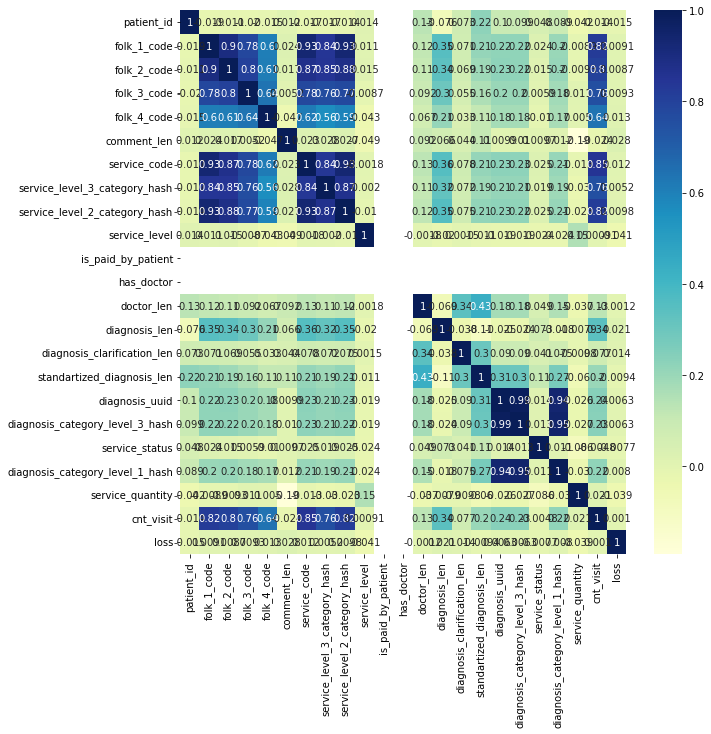

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

mp.figure(figsize = (10,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [17]:
data.isna().sum()

created_at_month                   0
patient_id                         0
folk_1_code                        0
folk_2_code                        0
folk_3_code                        0
folk_4_code                        0
comment_len                        0
service_code                       0
service_level_3_category_hash      0
service_level_2_category_hash      0
service_level                      0
status                             0
is_paid_by_patient                 0
has_doctor                         0
doctor_len                         0
diagnosis_len                      0
diagnosis_clarification_len        0
standartized_diagnosis_len         0
diagnosis_uuid                     0
diagnosis_category_level_3_hash    0
service_status                     0
diagnosis_category_level_1_hash    0
service_quantity                   0
cnt_visit                          0
дата убытка                        0
loss                               2
month                              0
d

In [18]:
data = data.loc[data['loss'].notna()]

In [19]:
data

,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,service_level_2_category_hash,...,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,дата убытка,loss,month
0,2020-07,3383,1,1,1,1,211.000000,1,1,1,...,0.0,1,1,0.428571,1,1.000,1,2020-07-19,6.840,2020-07
1,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-31,2.090,2020-07
2,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-19,3.150,2020-07
3,2020-07,3533,2,1,2,1,72.166667,2,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-17,9.200,2020-07
4,2020-07,3673,1,1,1,1,31.000000,1,1,1,...,0.0,1,1,0.000000,1,5.000,1,2020-07-15,2.720,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226374,2022-02,203973,1,1,1,1,117.000000,1,1,1,...,52.0,1,1,0.000000,1,1.000,1,2022-02-17,1.700,2022-02
226375,2022-02,203992,1,1,1,1,356.000000,1,1,1,...,46.0,1,1,0.000000,1,1.000,1,2022-02-25,0.702,2022-02
226376,2022-02,203999,1,1,1,1,30.500000,1,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-24,6.050,2022-02
226377,2022-02,203999,1,1,1,1,30.500000,1,1,1,...,70.0,1,1,0.000000,1,1.000,2,2022-02-25,1.650,2022-02


In [20]:
data.isna().sum()

created_at_month                   0
patient_id                         0
folk_1_code                        0
folk_2_code                        0
folk_3_code                        0
folk_4_code                        0
comment_len                        0
service_code                       0
service_level_3_category_hash      0
service_level_2_category_hash      0
service_level                      0
status                             0
is_paid_by_patient                 0
has_doctor                         0
doctor_len                         0
diagnosis_len                      0
diagnosis_clarification_len        0
standartized_diagnosis_len         0
diagnosis_uuid                     0
diagnosis_category_level_3_hash    0
service_status                     0
diagnosis_category_level_1_hash    0
service_quantity                   0
cnt_visit                          0
дата убытка                        0
loss                               0
month                              0
d

Данные без пропусков. Ничего заменять не надо.

In [21]:
data['is_paid_by_patient'].unique()

array([False])

In [22]:
data['is_paid_by_patient'] = data['is_paid_by_patient'].astype(int)
data['is_paid_by_patient'].unique()

/tmp/ipykernel_35380/2780819650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_paid_by_patient'] = data['is_paid_by_patient'].astype(int)


array([0])

In [23]:
data['has_doctor'].unique()

array([ True])

In [24]:
data['has_doctor'] = data['has_doctor'].astype(int)
data['has_doctor'].unique()

/tmp/ipykernel_35380/108702084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_doctor'] = data['has_doctor'].astype(int)


array([1])

Я бы удалила эти переменные, так как они принимают лишь одно значение. (has_doctor, is_paid_by_patient)

Дополнительно выведем информацию о категориальных и интервальных признаках.

In [30]:
info_df = pd.DataFrame(list(zip(data.columns, data.nunique(), data.nunique()/data.shape[0]*100)))
info_df.columns = ['column', 'uniq', 'uniq_per']
info_df

,column,uniq,uniq_per
0,created_at_month,20,0.008835
1,patient_id,32806,14.491755
2,folk_1_code,8,0.003534
3,folk_2_code,7,0.003092
4,folk_3_code,6,0.002650
5,folk_4_code,3,0.001325
6,comment_len,6431,2.840836
7,service_code,7,0.003092
8,service_level_3_category_hash,5,0.002209
9,service_level_2_category_hash,8,0.003534


In [31]:
categorical = list(data.dtypes[data.dtypes == "object"].index)
categorical

['status', 'дата убытка']

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

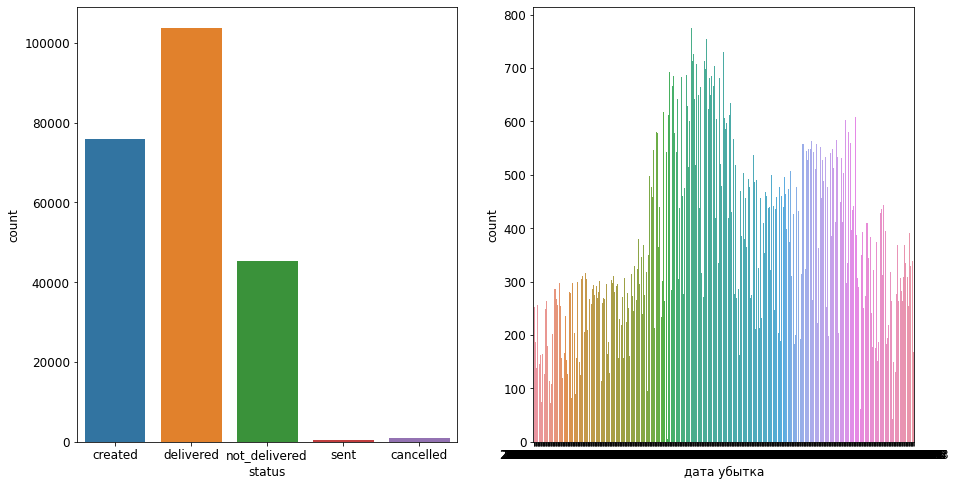

In [34]:
# распределения данных по всем категориальным показателям
plt.rcParams['font.size'] = 12

ok, [ax0, ax1] = plt.subplots(nrows = 1, ncols = 2, figsize = [15, 8])
sns.countplot(x='status', data=data, ax = ax0);
sns.countplot(x='дата убытка', data=data, ax = ax1);

In [35]:
numeric = list(data.dtypes[data.dtypes != "object"].index)
numeric

['created_at_month',
 'patient_id',
 'folk_1_code',
 'folk_2_code',
 'folk_3_code',
 'folk_4_code',
 'comment_len',
 'service_code',
 'service_level_3_category_hash',
 'service_level_2_category_hash',
 'service_level',
 'is_paid_by_patient',
 'has_doctor',
 'doctor_len',
 'diagnosis_len',
 'diagnosis_clarification_len',
 'standartized_diagnosis_len',
 'diagnosis_uuid',
 'diagnosis_category_level_3_hash',
 'service_status',
 'diagnosis_category_level_1_hash',
 'service_quantity',
 'cnt_visit',
 'loss',
 'month']

In [36]:
numeric = [
 'patient_id',
 'folk_1_code',
 'folk_2_code',
 'folk_3_code',
 'folk_4_code',
 'comment_len',
 'service_code',
 'service_level_3_category_hash',
 'service_level_2_category_hash',
 'service_level',
 'is_paid_by_patient',
 'has_doctor',
 'doctor_len',
 'diagnosis_len',
 'diagnosis_clarification_len',
 'standartized_diagnosis_len',
 'diagnosis_uuid',
 'diagnosis_category_level_3_hash',
 'service_status',
 'diagnosis_category_level_1_hash',
 'service_quantity',
 'cnt_visit',
 'loss']

In [37]:
info_df = pd.DataFrame(list(zip(numeric, data[numeric].mean(), data[numeric].median(), data[numeric].std(), data[numeric].min(), data[numeric].max(), data[numeric].dtypes)))
info_df.columns = ['column', 'mean', 'median', 'std', 'min', 'max', 'types']
info_df

,column,mean,median,std,min,max,types
0,patient_id,80320.774010,78438.000000,38719.787421,543.000000,204818.00000,int64
1,folk_1_code,1.446322,1.000000,0.731095,1.000000,8.00000,int64
2,folk_2_code,1.408562,1.000000,0.677401,1.000000,7.00000,int64
3,folk_3_code,1.354873,1.000000,0.608055,1.000000,6.00000,int64
4,folk_4_code,1.251483,1.000000,0.467591,1.000000,3.00000,int64
5,comment_len,154.661093,111.000000,149.126609,0.000000,8442.00000,float64
6,service_code,1.478004,1.000000,0.773001,1.000000,7.00000,int64
7,service_level_3_category_hash,1.349779,1.000000,0.604015,1.000000,5.00000,int64
8,service_level_2_category_hash,1.438772,1.000000,0.721209,1.000000,8.00000,int64
9,service_level,3.412058,3.391414,0.566341,1.000000,6.00000,float64


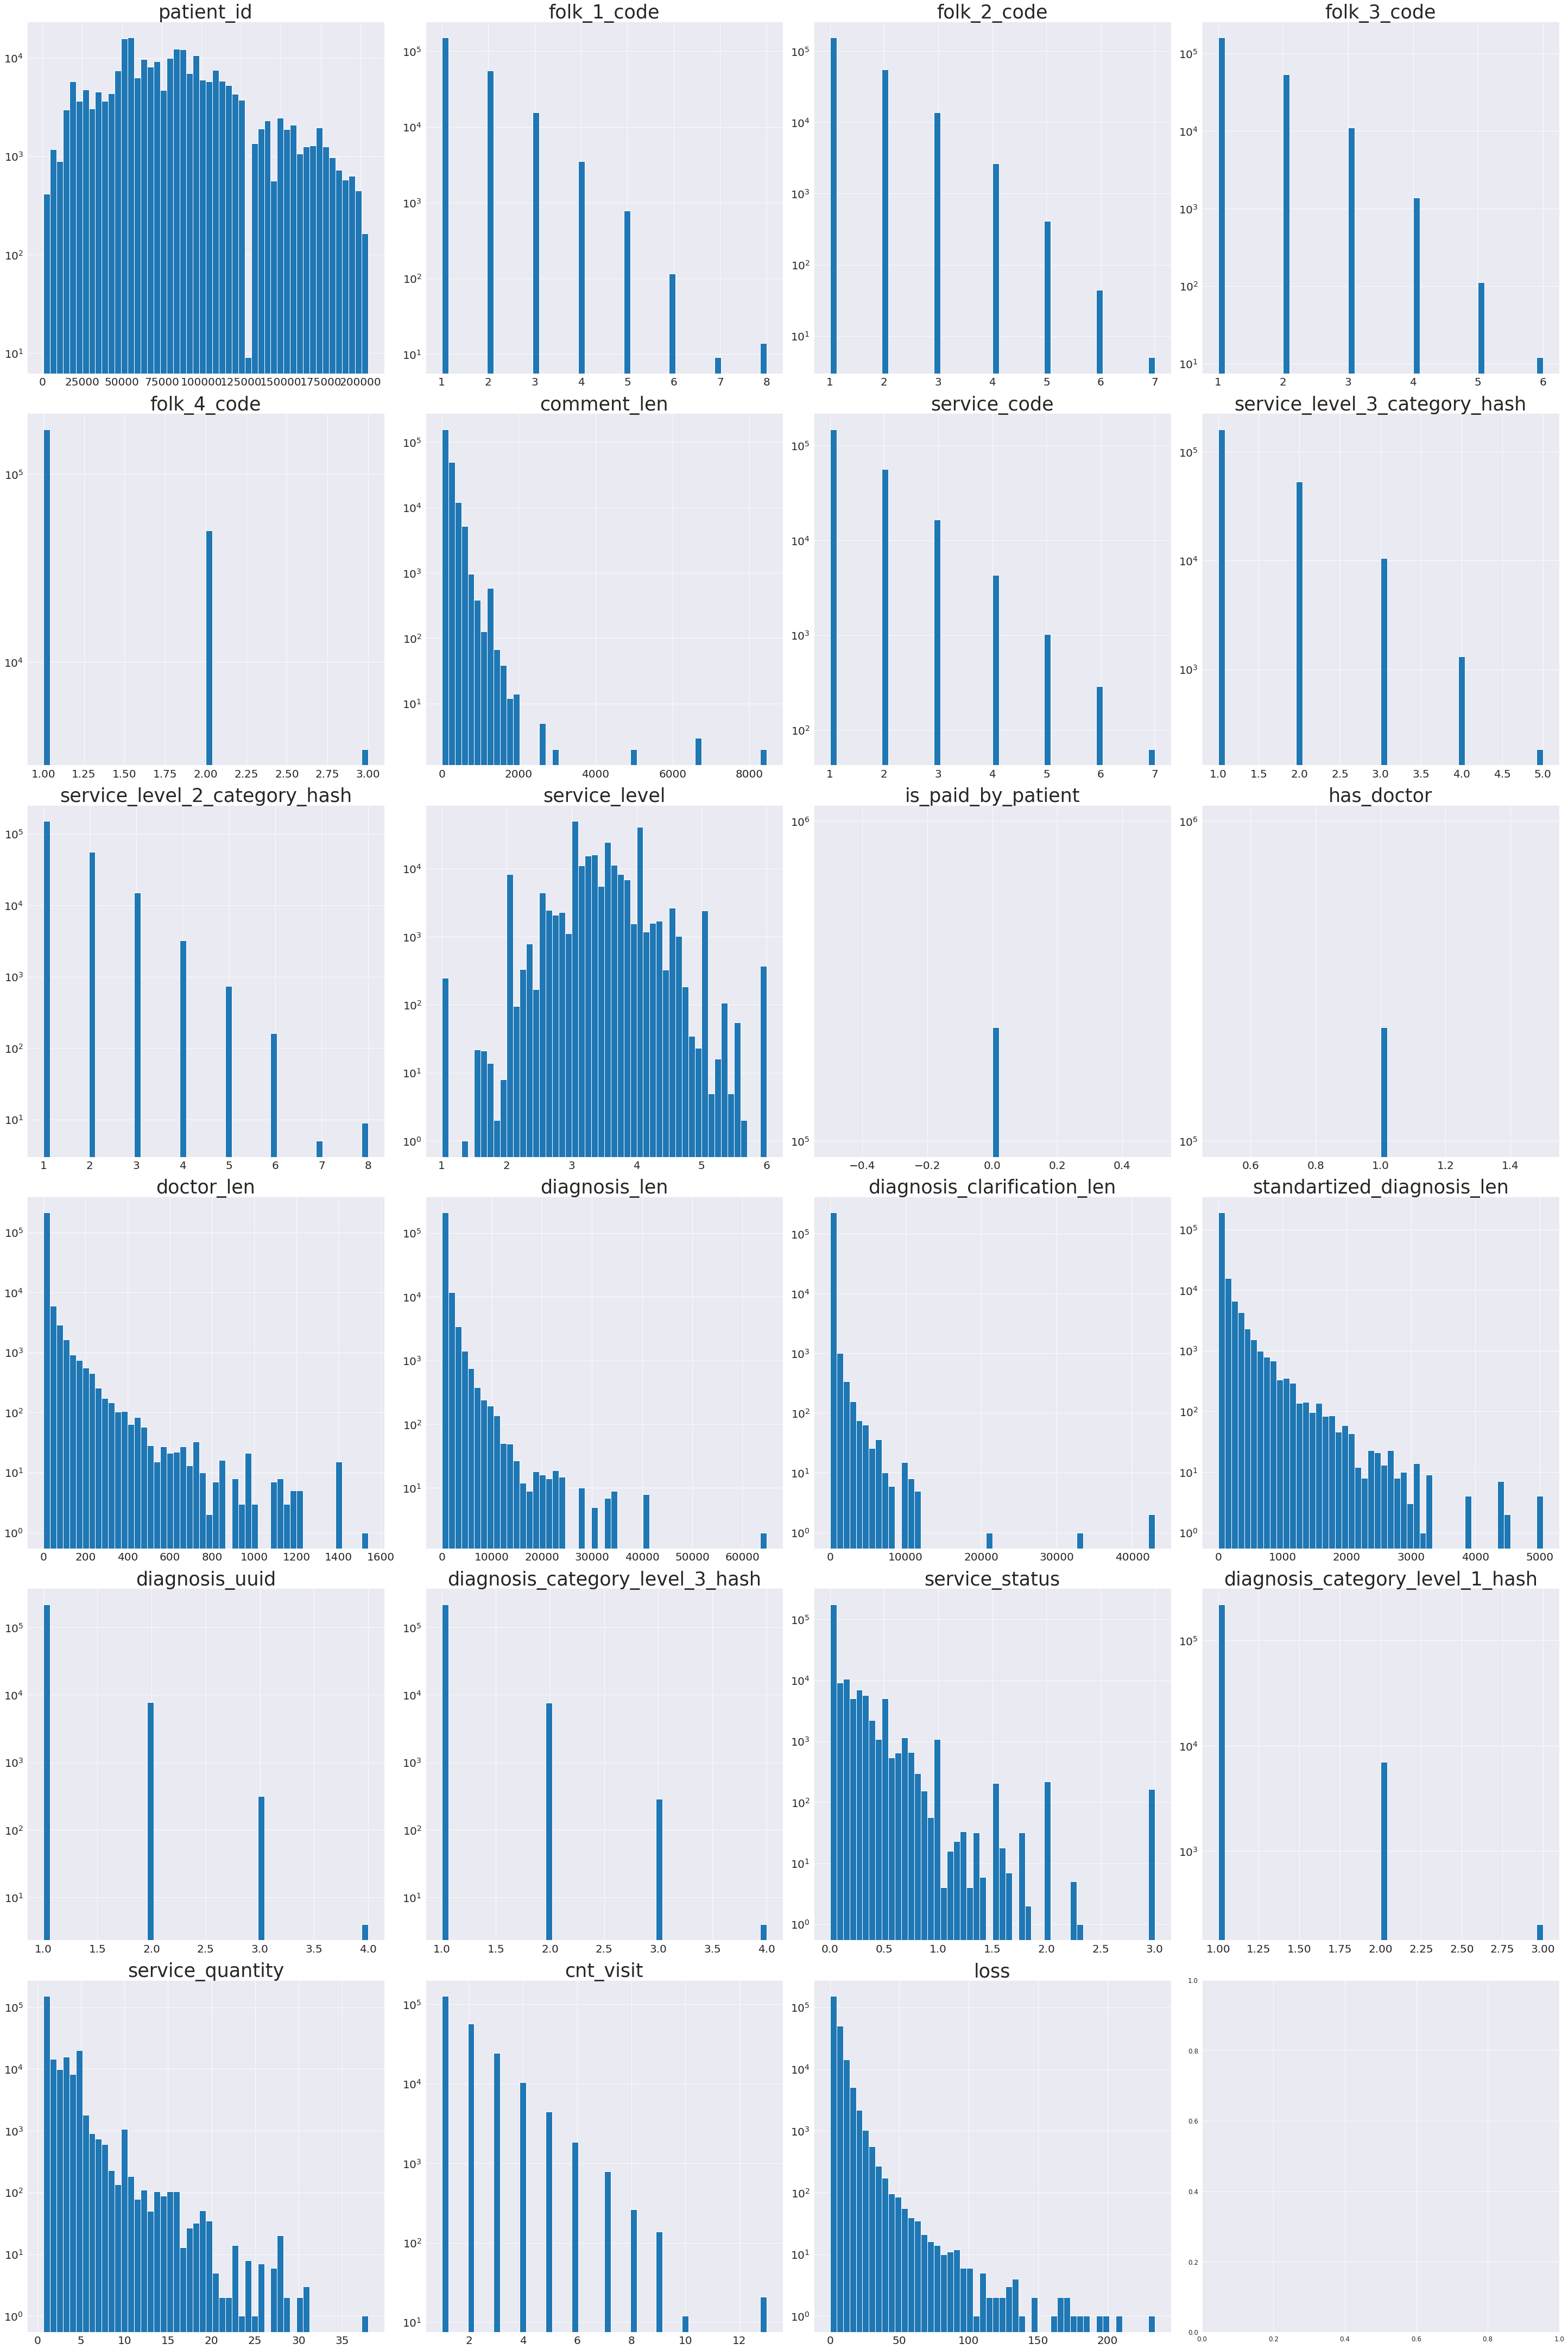

In [38]:
# интервальные
# Посмотрим на распределение для выявления выбросов

sns.set_style('darkgrid')

num_plots = len(numeric)
total_cols = 4
total_rows = 6

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(10*total_cols, 10*total_rows), constrained_layout=True)

for i, num in enumerate(numeric):
    row = i//total_cols
    pos = i%total_cols

    axs[row, pos].set_title(num, {'fontsize': 35})
    axs[row, pos].set_yscale('log')
    axs[row, pos].tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                   labelsize = 20)   #  Размер подписи
    axs[row, pos].hist(x=data[num], bins = 50)

plt.show()

array([[<AxesSubplot:title={'center':'loss'}>]], dtype=object)

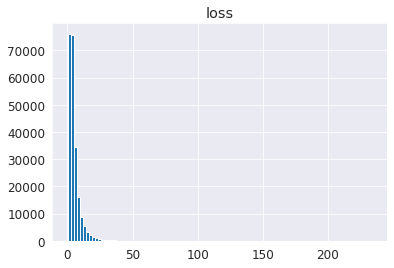

In [39]:
data.hist('loss', bins=100)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train = X_train['loss']
y_test = X_test['loss']

Попробуем несколько моделей на тех признаках, которые мы имеем сейчас: 

Ridge regression:

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error


# categorical_features = ["created_at", "status", "guarant_letter_uuid", "is_paid_by_patient", "has_doctor", 
#                        "service_code", "folk_1_code", "folk_2_code", "service_level_3_category_hash", 
#                        "service_level_2_category_hash"]
categorical_features = ["status", "is_paid_by_patient", "has_doctor", 
                       "service_code", "folk_1_code", "folk_2_code", "service_level_3_category_hash", 
                       "service_level_2_category_hash"]

numeric_features = ["comment_len", "doctor_len", "diagnosis_len", "diagnosis_clarification_len", "standartized_diagnosis_len",
                    "service_status", "service_quantity", "service_level"]

features = numeric_features + categorical_features

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  0.012631152181946548 
 MAE =  3.0790832195396414 
 MSE =  27.727766258755484 
 RMSE =  5.265716120221017


Lasso Regression:

In [121]:
from sklearn.linear_model import Lasso
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  -4.716811522920139e-06 
 MAE =  3.1118641650275496 
 MSE =  28.08261280136358 
 RMSE =  5.299303048643622


Decision Tree:

In [122]:
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', DecisionTreeRegressor(max_depth = 100))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  -0.03783660181543547 
 MAE =  3.02307898066635 
 MSE =  29.145025968271504 
 RMSE =  5.398613337540623


Catboost:

In [123]:
from catboost import CatBoostRegressor

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', CatBoostRegressor(iterations = 500, verbose = False))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  0.06953591136129722 
 MAE =  2.98286705424184 
 MSE =  26.129739477758072 
 RMSE =  5.111725684908969


______
Полносвязная нейронная сеть

In [143]:
y_train = y_train.values
y_test = y_test.values

In [133]:
X_train[features].dtypes

comment_len                      float64
doctor_len                         int64
diagnosis_len                      int64
diagnosis_clarification_len        int64
standartized_diagnosis_len       float64
service_status                   float64
service_quantity                 float64
service_level                    float64
status                            object
is_paid_by_patient                 int64
has_doctor                         int64
service_code                       int64
folk_1_code                        int64
folk_2_code                        int64
service_level_3_category_hash      int64
service_level_2_category_hash      int64
dtype: object

In [135]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for f in ['status']: #features:
    le.fit(X_train[f])
    X_train[f] = le.transform(X_train[f])
    X_test[f] = le.transform(X_test[f])

/tmp/ipykernel_9247/1958759946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[f] = le.transform(X_train[f])
/tmp/ipykernel_9247/1958759946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[f] = le.transform(X_test[f])


In [141]:
X_train = X_train[features].iloc[:, :].values
X_train

array([[119. ,  16. ,   0. , ...,   1. ,   1. ,   1. ],
       [ 43. ,  43. ,   0. , ...,   1. ,   1. ,   1. ],
       [333.5,   0. ,   0. , ...,   1. ,   1. ,   1. ],
       ...,
       [ 41. ,   0. ,  66. , ...,   1. ,   1. ,   1. ],
       [ 92. ,   0. ,   0. , ...,   1. ,   1. ,   1. ],
       [ 55. ,   0. , 240. , ...,   1. ,   1. ,   1. ]])

In [142]:
X_test = X_test[features].iloc[:, :].values
X_test

array([[1.9425e+02, 0.0000e+00, 2.8530e+03, ..., 3.0000e+00, 3.0000e+00,
        2.0000e+00],
       [7.0500e+02, 0.0000e+00, 2.5900e+03, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [8.0250e+01, 0.0000e+00, 3.2000e+01, ..., 1.0000e+00, 2.0000e+00,
        1.0000e+00],
       ...,
       [1.9500e+02, 0.0000e+00, 3.3200e+02, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.7000e+01, 0.0000e+00, 4.4600e+02, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.1000e+01, 0.0000e+00, 4.4000e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [146]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ss2 = StandardScaler()
y_train = ss2.fit_transform(y_train[:, None]).reshape(-1)
y_test = ss2.transform(y_test[:, None]).reshape(-1)

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Don't forget to rescale the results back to measure loss in original space
y_test__ = y_test * ss2.scale_ + ss2.mean_
y_train__ = y_train * ss2.scale_ + ss2.mean_
y_pred__ = y_pred * ss2.scale_ + ss2.mean_
y_train_pred__ = y_train_pred * ss2.scale_ + ss2.mean_

print("Test RMSE = %.2f" % mean_squared_error(y_test__, y_pred__, squared=False))
print("Train RMSE = %.2f" % mean_squared_error(y_train__, y_train_pred__, squared=False))

Test RMSE = 5.28
Train RMSE = 5.26


In [147]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [148]:
from IPython.display import display, clear_output

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

import random

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [149]:
SEED = 70
LR = 3e-2
WEIGHT_DECAY = 1e-3
NUM_EPOCHS = 15
GAMMA = 0.9995
BATCH_SIZE = 250
EVAL_BATCH_SIZE = 250
DEVICE = 'cpu'

In [150]:
set_random_seed(SEED)

In [151]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = SEED)

In [152]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
        self.len = len(X)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [153]:
train_dl = DataLoader(
    MyDataset(X_train, y_train),
    batch_size = BATCH_SIZE,
    shuffle = True
)

val_dl = DataLoader(
    MyDataset(X_val, y_val),
    batch_size = EVAL_BATCH_SIZE,
    shuffle = False
)

test_dl = DataLoader(
    MyDataset(X_test, y_test),
    batch_size = EVAL_BATCH_SIZE,
    shuffle = False
)

dls = {'train': train_dl, 'val': val_dl, 'test': test_dl}

In [160]:
class Model(nn.Module):
    def __init__(self, in_features = 16, out_features = 1):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.hidden_size = int(np.sqrt(in_features + out_features)) #гиперпараметр (размерность матрицы тоже гиперпараметр)
        
        self. sequential = nn.Sequential(
            nn.Linear(in_features, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, 300),
            nn.BatchNorm1d(300),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(300, self.out_features)
        )
        
    def forward(self, x):
        x = self.sequential(x)
        return x

In [161]:
train_set = MyDataset(X_train, y_train)
train_loader = train_dl

test_set = MyDataset(X_test, y_test)
test_loader = test_dl

model = Model()
#model.to(DEVICE) #DEVICE = 'cuda'

optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=GAMMA)
criterion = nn.MSELoss()

In [162]:
def train(model, optimizer, criterion, train_loader, test_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    
    metrics_dict = {
        "Epoch": [],
        "Train RMSE": [],
        "Val RMSE": [],
    }

    # Train loop
    for epoch in tqdm(range(NUM_EPOCHS)):
        metrics_dict["Epoch"].append(epoch)
        for stage in ['train', 'val']:
            with torch.set_grad_enabled(stage == 'train'): # Whether to start building a graph for a backward pass
                if stage == 'train':
                    model.train() # Enable some "special" layers (will speak about later)
                else:
                    model.eval() # Disable some "special" layers (will speak about later)

                loss_at_stage = 0 
                for batch in dls[stage]:
                    x_batch, y_batch = batch
                    x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)

                    y_pred = model(x_batch.float()).view(-1) # forward pass: model(x_batch) -> calls forward()
                    loss = criterion(y_pred, y_batch.float()) # ¡Important! y_pred is always the first arg
                    if stage == "train":
                        loss.backward() # Calculate the gradients of all the parameters wrt loss
                        optimizer.step() # Update the parameters
                        scheduler.step()
                        optimizer.zero_grad() # Zero the saved gradient
                        
                    with torch.no_grad():
                        # Don't forget to rescale the results back to measure loss in original space
                        y_pred__ = y_pred * ss2.scale_ + ss2.mean_
                        y_batch__ = y_batch * ss2.scale_ + ss2.mean_
                        loss_at_stage += (torch.square((y_pred__ - y_batch__)).sum()).item()
                        
                rmse_at_stage = (loss_at_stage / len(dls[stage].dataset)) ** (1/2)
                metrics_dict[f"{stage.title()} RMSE"].append(rmse_at_stage)

        clear_output(wait=True)
        display(pd.DataFrame(metrics_dict))
        
        print(f'Epoch: {epoch + 1}')
    
        # Нарисуем график
        fig, ax = plt.subplots()
        x = np.arange(len(metrics_dict['Train RMSE']))
        ax.plot(x, metrics_dict['Train RMSE'], color='blue', label='train rmse')
        ax.plot(x, metrics_dict['Val RMSE'], color='red', label='val rmse')
        plt.title('Зависимость rmse')
        plt.ylabel('RMSE')
        plt.xlabel('Epoch')
        plt.show()

        
    
def rmse(preds, y_true):
    # Don't forget to rescale the results back to measure loss in original space
    preds__ = preds * ss2.scale_ + ss2.mean_
    y_true__ = y_true * ss2.scale_ + ss2.mean_
    return ((preds__ - y_true__) ** 2).mean() ** (1/2)

def eval_loop(model, X_val, X_test, y_val, y_test, model_is_nn=True, model_name="NN"):
    print(f"Model {model_name}")
    for name, x_eval, y_eval in zip(['val', 'test'], [X_val, X_test], [y_val, y_test]):
        if model_is_nn:
            with torch.no_grad():
                preds = model(torch.Tensor(x_eval)).view(-1)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(x_eval)
        rmse_val = rmse(preds, y_eval)
        print(f'{name}: RMSE = {rmse_val:.2f}')
    
    
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''

    name, x_eval, y_eval = 'test', X_test, y_test
    model.eval() # Disable some "special" layers (will speak about later)
    with torch.no_grad():
        preds = model(torch.Tensor(x_eval)).view(-1)

    print("Test RMSE = %.2f" % rmse(preds, y_eval))
        
    return preds

,Epoch,Train RMSE,Val RMSE
0,0,5.435224,5.104445
1,1,5.281904,5.095513
2,2,5.274352,5.087152
3,3,5.270176,5.086543
4,4,5.268559,5.085219
5,5,5.264820,5.083665
6,6,5.262089,5.079040
7,7,5.261278,5.080820
8,8,5.259006,5.079292
9,9,5.258074,5.079176


Epoch: 15


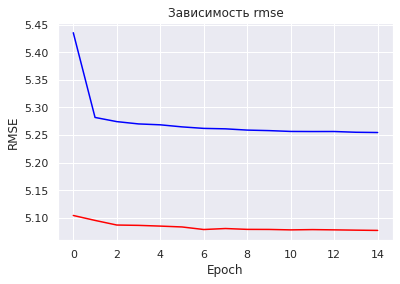

In [163]:
train(model, optimizer, criterion, train_loader, val_dl)